#Using online retail data to 
#MAXIMIZE PROFITS.

###Method 1: Find Priority Countries by Total Spent.(DONE, may need updating))

###Method 2: Code Customers by High, Meduim and Low 'Cart Value'(the total sum of all products purchased during an order process.(WORKING)

###Method 3: Bar Chart of Product Trends By Month (WORKING)

###Method 4: Predict Repeat Customers using Random Forest. (DONE, Needs Optimizing)

###Method 5: Bar Graph of when Repeat Customers come. Bar graph of when New Customers come.[Jordon](TODO)

### Method 6: Multiple Linear Regression Model[Raul](DONE)

### Method 7: Ridge Regression[Brian?]

Method 7 TODO What is the new results using mean_absolute_error with new featres?


##Step1) Create Hypothosis

Find seasonal products/trends

TODO create graph of repeat customers etc. Jan -March , Oct-Dec 

When do new customers come in?(when to do marketing campaigns)

Increase cart value(avg. how much customer spent across the month). Which product/month has highest cart value. 

Spending Score based on ??? Bucket (low,med,high) value. Look at average price. 
##Step 2) Go to the data






In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
#Import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Import online_retail_II.csv
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.csv to online_retail_II.csv


In [ ]:
def wrangle(csv):
  df=pd.read_csv(csv,
                 index_col="InvoiceDate",
                 parse_dates=True)
  df.drop(columns=["Description","Invoice"], inplace=True)
  #Deal with null(unknown Customer ID) values.

  # Create a boolean mask indicating which rows have missing values
  missing_mask = df.isnull().any(axis=1)
  
  # Define the categorical features
  df['StockCode']=OrdinalEncoder().fit_transform(df['StockCode'])
  df['Country']=OrdinalEncoder().fit_transform(df['Country'])
  # Use the mask to create two separate DataFrames
  unknown_df = df[missing_mask]
  known_df = df[~missing_mask]
  return unknown_df,known_df

In [ ]:
unknown_df,known_df=wrangle("online_retail_II.csv")
unknown_df

,StockCode,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,
2009-12-01 10:52:00,131,-96,0.00,NaN,1
2009-12-01 10:52:00,214,-240,0.00,NaN,1
2009-12-01 10:53:00,92,-192,0.00,NaN,1
2009-12-01 11:44:00,333,-50,0.00,NaN,1
2009-12-01 11:49:00,408,1,0.55,NaN,1
...,...,...,...,...,...
2011-12-09 10:26:00,142,5,4.13,NaN,1
2011-12-09 10:26:00,625,4,4.13,NaN,1
2011-12-09 10:26:00,113,1,4.96,NaN,1


Predict the quantity of the MOST common item, based on orders of the past 30 days.
step 1 filter by most common item
step 2 Feature engineer 

# add a rolling function of the average of price variates over the last thirty days. 

In [ ]:
known_df['StockCode']=OrdinalEncoder().fit_transform(known_df['StockCode'])
known_df['Country']=OrdinalEncoder().fit_transform(known_df['Country'])

In [ ]:
type(dknown_dff["InvoiceDate"][0])

NameError: ignored

In [ ]:
minidf=known_df.head(5000)
minidf.head(100)

##Method 1: Find Priority Countries by Total Spent.(Done, may need updating) 

In [ ]:
#Create totalspending column.
known_df['totalspending'] = known_df['Quantity'] * known_df['Price']

In [ ]:
### To reduce Complexity and scope, we will eliminiate returns. We assume all returns are negative. 



known_df=known_df.loc[known_df["totalspending"]>0].reset_index(drop=True)
known_df["totalspending"].min()

KeyError: ignored

We have found an anomoly, if
#Company A transaction 1- bought 1000 of stuff
#Company A transaction 101- returned 1000 of stuff
#Company A balance 0

#Then why do we have some companies with -1000? 

#Explainations: 
  #Items purchused from previous year. 
  #Unrecored purchases. 
  #Items returned for more than selling price.  


In [ ]:
countries=known_df["Country"].unique()
results=[]
for i in countries:
  count_spend=known_df['totalspending'].loc[known_df['Country']==i]
  results.append(sum(count_spend))


In [ ]:
a=known_df.groupby("Country")["totalspending"].sum().reset_index().sort_values(by="totalspending",ascending=False).reset_index(drop=True)
pd.DataFrame(a)
display(a)

In [ ]:
Rankings=list(zip(results,countries))
a=pd.DataFrame(Rankings,columns=["total_spending","countries"])

In [ ]:
a.sort_values("total_spending",ascending=False).reset_index(drop=True)

##Method 2: Code Known Customers by High, Meduim and Low Cart Value(the total sum of all products purchased during an order process.(WORKING) 

1)Determine your customer segmentation goals and variables.

2)Break goals into customer-centric segmentation projects.

3)Set up and prioritize each customer segmentation project.

4)Collect and organize your customer data.

5)Segment your customers into groups of your choice.

6)Target and market to your client and user segments.

7)Run regular customer segmentation analysis.

###DataFrame of Known Customers


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa0bf2045e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa0bf204b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa0bf204340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0bf1f80a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0bf1f8340>],
 'means': []}

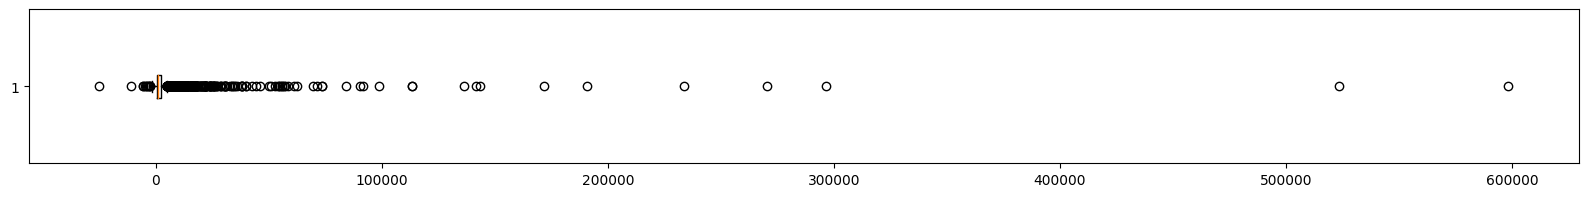

In [ ]:
fig = plt.figure(figsize = (20, 2))
plt.boxplot(y,vert=False)

In [ ]:
known_df['totalspending'] = known_df['Quantity'] * known_df['Price']


In [ ]:
customer_spending=Kndf.groupby("Customer ID")["totalspending"].sum().reset_index().sort_values(by="totalspending",ascending=False)
customer_spending["index"]=np.arange(0,len(customer_spending))
customer_spending.set_index("index",inplace=True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


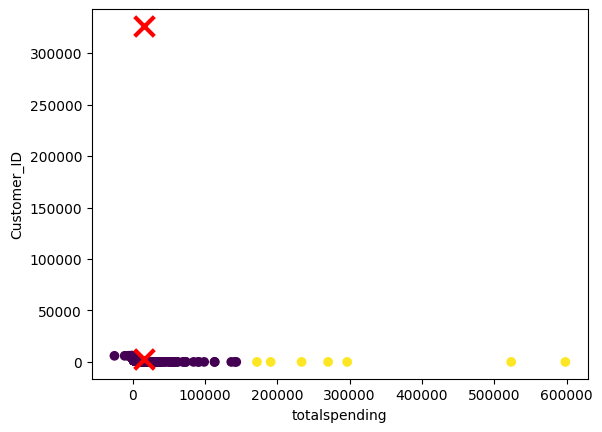

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
#customer_spending


# Normalize the data
#data_norm = (customer_spending - customer_spending.min()) / (customer_spending.max() - customer_spending.min())

# Choose the number of clusters
k = 2

# Train the K-Means clustering model on the normalized data
kmeans = KMeans(n_clusters=k)
kmeans.fit(customer_spending)

# Visualize the clusters
plt.scatter(customer_spending['totalspending'], range(len(customer_spending)), c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('totalspending')
plt.ylabel('Customer_ID')
plt.show()

In [ ]:
# Create a list of groups for each cluster
group_labels = kmeans.labels_
group_0 = customer_spending[group_labels == 0]
group_1 = customer_spending[group_labels == 1]

# Print the number of people in each group
print('Number of people in Group 0:', len(group_0))
print('Number of people in Group 1:', len(group_1))

Number of people in Group 0: 5935
Number of people in Group 1: 7


In [ ]:
group_1

,Customer ID,totalspending
index,,
0,18102.0,598215.22
1,14646.0,523342.07
2,14156.0,296564.69
3,14911.0,270248.53
4,17450.0,233579.39
5,13694.0,190825.52
6,17511.0,171885.98


#Method 3  Bar Chart of Product Trends By Month (WORKING)


In [ ]:
#There are over 5699 unique items. However, which items sell the most?
#We are going to create a dataframe that ranks items by volume. 

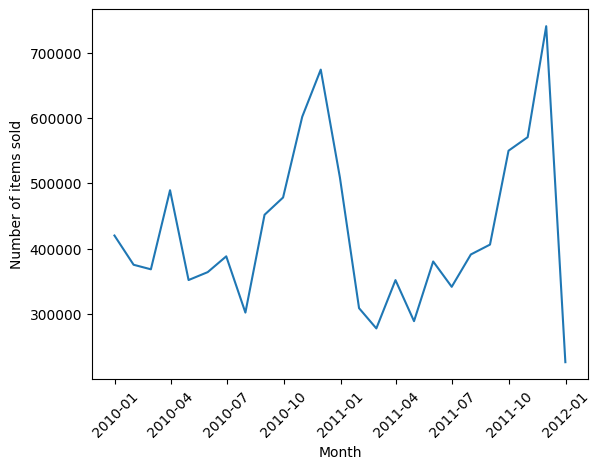

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# Load the data
data = pd.read_csv('online_retail_II.csv', parse_dates=['InvoiceDate'])

# Aggregate the data by month
monthly_data = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().reset_index()

# Visualize the data
plt.plot(monthly_data['InvoiceDate'], monthly_data['Quantity'],markersize=16)
plt.xlabel('Month')
plt.ylabel('Number of items sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#For every month in the year provide a dataset listing
# 1) the top 100 items orded for the coming month
# 2) the quantity for these items. 

In [ ]:
len(df["StockCode"].value_counts())


5305

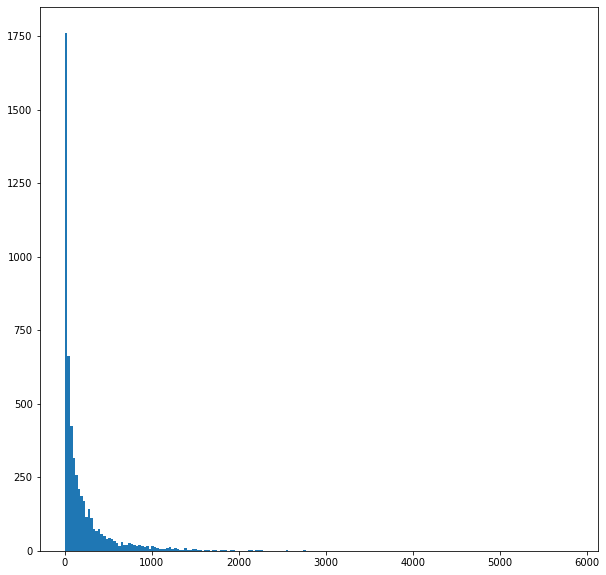

In [ ]:

plt.figure(figsize=(10,10))
plt.hist(df["StockCode"].value_counts(), bins=200)
plt.show()

In [ ]:
codes=df["StockCode"].unique()
type(codes.tolist())

list

In [ ]:
#top_items=['84077', '85123A', '85099B', '21212', '84879', '22197', '17003', '21977', '84991', '22492', '15036', '21213', '22616', '84755', '20725', '22178', '22386', '21232', '84568', '84946', '21915', '22086', '85099F', '84992', '22952', '71459', '22355', '21982', '20724', '21975', '21980', '21080', '85099C', '23084', '16014', '21931', '21731', '22469', '21790', '22411', '47566', '22151', '21498', '84970S', '21981', '20727', '22423', '21985', '21984', '37410', '22383', '21929', '21181', '20719', '84212', '21928', '20728', '84945', '22417', '20726', '22629', '84978', '20668', '22384', '22382', '84836', '23203', '21137', '21166', '72741', '22356', '21094', '21231', '84692', '20972', '22910', '20971', '20713', '20914', '20723', '21326', '22189', '21175', '22630', '22470', '22585', '84270', '22029', '22693', '22961', '22489', '21497', '84970L', '21791', '21733', '20712', '22077', '22909', '84598', '20975', '22294', '22385', '82482', '79321', '21704', '22659', '16156S', '22090', '85152', '84947', '21500', '22379', '21086', '21121', '22457', '22326', '22551', '21967', '22865', '22560', '21499', '22969', '21210', '21976', '82494L', '21787', '21703', '22045', '21918', '84826', '23199', '22558', '22328', '22577', '40016', '21085', '22297', '21091', '22556', '21930', '22554', '22866', '21986', '22083', '20718', '22867', '23209', '21099', '84347', '21914', '82580', '75049L', '21889', '16161P', '20974', '21877', '22534', '22699', '21092', '23201', '22610', '22740', '21122', '21829', '22595', '22993', '71477', '22188', '85175', '22418', '21495', '20711', '22348', '82600', '82583', '22998', '22114', '22030', '16033', '22149', '22578', '22147', '17084R', '23206', '21891', '23310', '23307', '22555', '84949', '84029E', '84378', '21314', '35961', '22112', '22561', '84988', '21506', '22027', '22632', '21672', '82484', '22951', '21390', '21916', '21385', '20993', '16237', '22444', '21871', '23202', '22666', '22741', '21669', '22557', '20676', '15056N', '23077', '21668', '22467', '84380', '22139', '84997D', '22530', '84050', '21673', '21136', '48138', 'POST', '22536', '20973', '23344', '21124', '22662', '22111', '16161U', '22652', '21108', '22296', '22697', '20685', '21908', '21174', '79000', '22791', '62018', '15056BL', '22727', '22988', '21088', '22544', '22633', '85220', '21238', '22381', '21156', '47591D', '22734', '22759', '84997B', '21671', '22219', '22959', '22646', '22158', '21165', '21868', '22960', '21096', '22333', '15034', '22704', '21509', '21169', '21670', '22065', '23301', '22621', '22295', '37340', '22084', '22440', '23232', '23298', '22907', '22130', '23293', '22966', '21098', '22620', '22531', '21559', '22661', '21507', '35970', '22087', '22335', '23309', '85150', '22367', '23343', '84987', '23076', '21917', '22047', '84997C', '22553', '21989', '21154', '82581', '23230', '84950', '22698', '20677', '21485', '22726', '21892', '48194', '20979', '22041', '21754', '10002', '23204', '22154', '84375', '22464', '21481', '22432', '22771', '21936', '22950', '21786', '22243', '21240', '84029G', '21172', '22198', '22082', '21239', '23207', '48187', '84520B', '22834', '22491', '22816', '22712', '21519', '21479', '22720', '21988', '23231', '22150', '21623', '22579', '22352', '22037', '21523', '22710', '21935', '21242', '22419', '23200', '22609', '22945', '20991', '21900', '21078', '21810', '22488', '84832', '22413', '21974', '47503E', '21508', '21875', '23078', '22161', '21899', '22983', '21313', '72008', '22549', '23300', '82552', '22196', '84406B', '22602', '22064', '22437', '51014A', '22818', '20675', '21535', '85049E', '21874', '21621', '85110', '22138', '21155', '21429', '22046', '22596', '20996', '20983', '22728', '22631', '85049A', '22540', '21870', '22028', '37413', '23208', '23245', '21833', '84596B', '22713', '20992', '20717', '21983', '21811', '47556B', '17096', '18007', '85014B', '22152', '22900', '23308', '23170', '23171', '21901', '22155', '21987', '85199S', '84971S', '23295', '22227', '48185', '82582', '22156', '21544', '37370', '22338', '21164', '85061W', '21830', '22563', '22571', '21592', '22113', '22722', '21746', '22273', '22537', '21035', '22466', '20984', '22986', '22528', '22645', '20679', '47599A', '22663', '22153', '22614', '22567', '22539', '23355', '22608', '21755', '21114', '72351B', '22507', '23205', '22908', '21243', '21876', '47590B', '47503A', '20759', '21843', '20756', '22593', '82578', '16046', '22601', '21844', '20760', '37351', '16047', '22144', '22174', '22024', '22711', '22708', '82551', '21524', '85178', '23167', '22716', '22570', '22569']

In [ ]:
#Takes 4m to compute.
codes=df["StockCode"].unique()
codes.tolist()
quantities=[]
for i in codes[:-1]:
  x=df['Quantity'].loc[df["StockCode"]==i]
  x=sum(x)
  quantities.append(x)
  items=list(zip(codes,quantities))
items=pd.DataFrame(top_items,columns=["StockCode","Number Ordered"])
items

,StockCode,Number Ordered
0,85048,2657
1,79323P,-633
2,79323W,-3050
3,22041,7819
4,21232,38033
...,...,...
5299,23576,198
5300,23562,253
5301,23561,170
5302,23609,1


In [ ]:
top_items=top_items.sort_values(by="Number Ordered",ascending=False).head(500)

In [ ]:
df.groupby(pd.Grouper(key='InvoceDate', freq='M'))

In [ ]:
x=pd.to_datetime("2009-12-01 07:45:00")
x_list=(x,x,x,x)
b=x_list.groupby(pd.Grouper(key='InvoceDate', freq='M'))
b

AttributeError: ignored

In [ ]:
for i in top_items["StockCode"]:
  x=df.loc[df['StockCode']==i]
    for k in range(len(x)):
      if x[k].month==1
        n.append(1)

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(top_items.value_counts(), bins=200)
plt.show()

In [ ]:
top_items.sorted(ascending=False).head(500)

AttributeError: ignored

In [ ]:
df['StockCode'].loc[df["StockCode"].value_counts()>500)]

In [ ]:
meth2_df=df[['InvoiceDate','StockCode','Quantity']]
meth2_df.set_index("InvoiceDate",inplace=True)
meth2_df.head()

In [ ]:
type(meth2_df['InvoiceDate'][0])

NameError: ignored

In [ ]:
meth2_df["Month"]=pd.DatetimeIndex(df["InvoiceDate"]).month
meth2_df["Month"].value_counts()

In [ ]:
meth2_df.loc[df['StockCode']contains ]

In [ ]:
stockseries=meth2_df['StockCode']

In [ ]:
months=[12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
for i in months:

  for i in stockseries:
    rows=df.loc[df['StockCode']==i]
    date=.to_datetime64()
  date=np.datetime64(date, 'M')
  date + 1
#every step another month is added until the last month is reached.
# The totals are then saved as values to a dictionary with Stockseries.index as the keys.



In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['months'] = pd.Categorical(df['months'], categories=months, ordered=True)
df.sort_values(...)  # same as you have now; can use inplace=True

numpy.datetime64('2009-12-01T07:45:00.000000001')

###Deal with Null Values

500

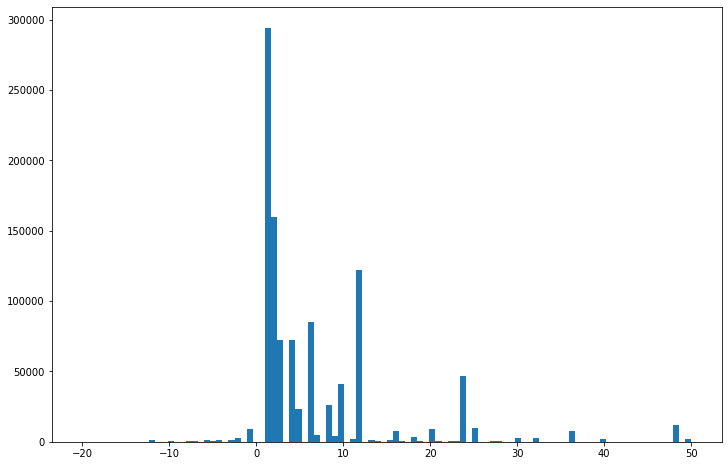

In [ ]:
#Found all Missing Customers
MissingCustomers=df.loc[df['Customer ID'].isnull()==True]
#Distribution of Quantiy Ordered for all Customers
fig = plt.subplots(figsize =(12, 8))
plt.hist(df['Quantity'], bins=100,range=(-20,50))

plt.show()

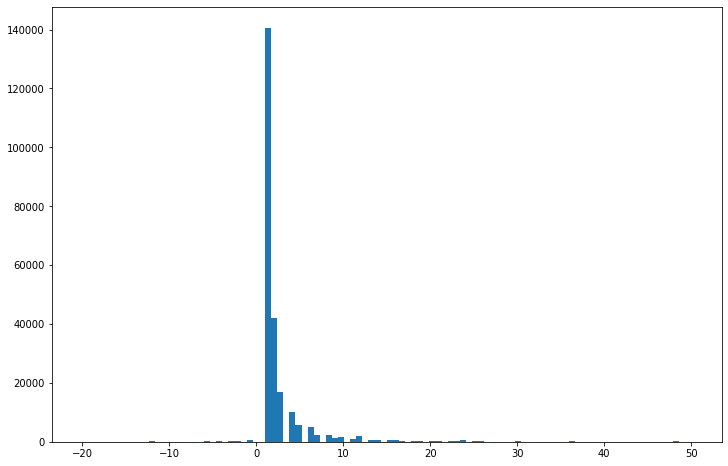

In [ ]:
#Distribution of Quantiy Ordered for all Customers
fig = plt.subplots(figsize =(12, 8))
plt.hist(MissingCustomers['Quantity'], bins=100,range=(-20,50))

plt.show()

In [ ]:
known_customers=df.loc[df['Customer ID'].isnull()==False]

In [ ]:
len(known_customers['Customer ID'].loc[known_customers['Customer ID']==12748.0])

7307

In [ ]:
known_customers['Customer ID'].value_counts().index()

TypeError: ignored

In [ ]:
NonR_customer=[]
for i in df['Customer ID'].value_counts().index:
  if len(known_customers['Customer ID'].loc[known_customers['Customer ID']==i])>1:
    continue
  NonR_customer.append(i)

##Method 4:Find Repeat Customers and Perform Random Forest Classifier

In [ ]:
Repeat_customer=[]
for i in df['Customer ID']:
  if i in NonR_customer:
    Repeat_customer.append(False)
    continue
  Repeat_customer.append(True)

In [ ]:
df['Repeat_Customer']=Repeat_customer
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalSpending', 'Repeat_Customer'],
      dtype='object')

###TODO:Replace Country with Ordinal Encoder
###TODO:Standardize the values(price, quantitiy)

In [ ]:
#Predict Repeat Customers Using ____  'StockCode', 'Quantity', 'InvoiceDate', 'Price',  'Country', 
X=df[['StockCode', 'Quantity', 'InvoiceDate', 'Price',  'Country']]
y=df['Repeat_Customer']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [ ]:
len(X_test)/len(X_train)

0.25000117110280407

In [ ]:
#Encode StockCode
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

Pipe=make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),RandomForestClassifier())
Pipe.fit(X_train,y_train)
#df['StockCode']=Ord.transform(df['StockCode'])
#df['Country']=Ord.tranform(df['Country'])

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
print(Pipe.score(X_test,y_test))

0.9998454151539993


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,Pipe.predict(X_test))

0.9999227005160326

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,Pipe.predict(X_test)))

              precision    recall  f1-score   support

       False       0.60      0.09      0.15        34
        True       1.00      1.00      1.00    213441

    accuracy                           1.00    213475
   macro avg       0.80      0.54      0.58    213475
weighted avg       1.00      1.00      1.00    213475



###From the data, we can see that a grand majority of customers are returning customers. Churn is extremly low. 

#Method 6: Multiple Linear Regression

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

ModuleNotFoundError: ignored

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the date column as the index of the dataframe
df.set_index('date', inplace=True)

# Decompose the time series into trend, seasonality, and residuals using statsmodels
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

# Plot the original time series and the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
ax1.plot(df)
ax1.set_title('Original Time Series')
ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonality')
ax4.plot(decomposition.resid)
ax4.set_title('Residuals')

# Show the plot
plt.show()

In [ ]:
#LEAST ORDINARY SQUARES
# Libraries for R^2 visualization
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from category_encoders import OrdinalEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
target ='Quantity'
X = known_df.drop(columns = target, axis = 1)
y = known_df[target]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
# Providing the mean of our target we can have a baseline we always work with our train data & leave the test data for the end. 
y_pred_baseline = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print('Quantity:', y_train.mean())
print('Baseline MAE:', baseline_mae)

Quantity: 12.501427616146392
Baseline MAE: 13.791227331755492


In [ ]:
#Fitting
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#MAE Accuracy Score
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Training MAE: 13.76784341359538
Test MAE: 13.8290638389274


In [ ]:
# Training RMSE
print('Training R-Squared:', r2_score(y_train, model.predict(X_train)))

# Test RMSE
print('Test R-Squared:', r2_score(y_test, model.predict(X_test)))

Training R-Squared: 0.0002906756769159857
Test R-Squared: 0.00027442299073199283


In [ ]:
# Coefficient with the most value allways is the absolut value of our coefficient in this case is the [0]
print('The coefficient for Stock Code is:', model.coef_[0])
print('The coefficient for Price is:', model.coef_[1])
print('The coefficient for Customer ID is:', model.coef_[2])
print('The coefficient for Country is:', model.coef_[3])
# Intercept 
#print('The intercep for our model is:', model.intercept_)

The coefficient for Stock Code is: -0.0005397158253787512
The coefficient for Price is: -0.005086663531309533
The coefficient for Customer ID is: -0.00020597254245604234
The coefficient for Country is: 0.8475541238402394


#Ridge Regression

In [ ]:
known_df["avg_price_30d"]=known_df["Price"].rolling(window=30).mean()

known_df["avg_price_90d"]=known_df["Price"].rolling(window=90).mean()

known_df["avg_price_1y"]=known_df["Price"].rolling(window=252).mean()
known_df.dropna(inplace=True)

In [ ]:
known_df["avg_quant_30d"]=known_df["Quantity"].rolling(window=30).std()

known_df["avg_quant_90d"]=known_df["Quantity"].rolling(window=90).std()

known_df["avg_quant_1y"]=known_df["Quantity"].rolling(window=252).std()
known_df.dropna(inplace=True)

In [ ]:
known_df

,StockCode,Quantity,Price,Customer ID,Country,avg_price_30d,avg_price_90d,avg_price_1y,avg_quant_30d,avg_quant_90d,avg_quant_1y
InvoiceDate,,,,,,,,,,,
2009-12-01 13:07:00,757,1,5.95,17998.0,1,5.657000,2.704556,3.206151,5.575398,48.605400,32.930536
2009-12-01 13:07:00,758,1,5.95,17998.0,1,5.827000,2.693444,3.214881,5.575398,48.643683,32.936092
2009-12-01 13:07:00,759,1,3.75,17998.0,1,5.930333,2.731000,3.170437,5.575398,39.530288,32.936092
2009-12-01 13:07:00,760,2,5.95,17998.0,1,6.080333,2.787667,3.174405,5.569312,38.390718,32.937322
2009-12-01 13:07:00,761,24,0.42,17998.0,1,6.029333,2.782889,3.156429,6.802298,25.324057,32.939323
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,4444,6,2.10,12680.0,2,2.695333,2.310000,2.793056,6.926876,12.077987,17.506651
2011-12-09 12:50:00,4718,4,4.15,12680.0,2,2.805333,2.328444,2.803770,6.572671,12.108462,17.500661
2011-12-09 12:50:00,4720,4,4.15,12680.0,2,2.802000,2.341778,2.815278,6.572671,12.138202,17.494661


In [ ]:
#Ridge Regression

target ='Quantity'
X = known_df.drop(columns = target, axis = 1)
y = known_df[target]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
X

,StockCode,Price,Customer ID,Country,avg_price_30d,avg_price_90d,avg_price_1y,avg_quant_30d,avg_quant_90d,avg_quant_1y
InvoiceDate,,,,,,,,,,
2009-12-01 13:07:00,757,5.95,17998.0,1,5.657000,2.704556,3.206151,5.575398,48.605400,32.930536
2009-12-01 13:07:00,758,5.95,17998.0,1,5.827000,2.693444,3.214881,5.575398,48.643683,32.936092
2009-12-01 13:07:00,759,3.75,17998.0,1,5.930333,2.731000,3.170437,5.575398,39.530288,32.936092
2009-12-01 13:07:00,760,5.95,17998.0,1,6.080333,2.787667,3.174405,5.569312,38.390718,32.937322
2009-12-01 13:07:00,761,0.42,17998.0,1,6.029333,2.782889,3.156429,6.802298,25.324057,32.939323
...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,4444,2.10,12680.0,2,2.695333,2.310000,2.793056,6.926876,12.077987,17.506651
2011-12-09 12:50:00,4718,4.15,12680.0,2,2.805333,2.328444,2.803770,6.572671,12.108462,17.500661
2011-12-09 12:50:00,4720,4.15,12680.0,2,2.802000,2.341778,2.815278,6.572671,12.138202,17.494661


In [ ]:
# Providing the mean of our target we can have a baseline we always work with our train data & leave the test data for the end. 
y_pred_baseline = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
baseline_mae

13.784324844301768

In [ ]:
y_train

InvoiceDate
2010-11-04 16:50:00    12
2010-10-17 13:10:00     3
2011-09-08 12:04:00     2
2011-12-06 12:56:00     1
2011-05-25 12:55:00    12
                       ..
2010-09-07 13:25:00     1
2010-11-14 14:00:00     1
2010-04-26 15:43:00     2
2011-09-20 12:21:00    12
2010-04-16 15:55:00    12
Name: Quantity, Length: 658464, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Fitting
ridge=Ridge()
parameters={'alpha':[1,.5,.25,.10,.001]}
grid=GridSearchCV(ridge,parameters,n_jobs=-1,scoring='neg_mean_absolute_error')


grid.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.5, 0.25, 0.1, 0.001]},
             scoring='neg_mean_absolute_error')

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
grid.best_params_

{'alpha': 1}

In [ ]:
grid.best_score_,baseline_mae

(-14.065649790290195, 13.784324844301768)

In [ ]:
a=grid.best_estimator_.coef_
for i,k in enumerate(a):
  print(round(i,9),k)


0 -0.0005778289122553957
1 -0.012582105326949164
2 -0.00011561710430664384
3 0.8909666303026675
4 0.17361336945151545
5 -0.07099329539490266
6 0.1803343444723105
7 5.3964227218745284e-05
8 0.005385108465474201
9 0.00010578137236593736


In [ ]:
X

,StockCode,Price,Customer ID,Country,avg_price_30d,avg_price_90d,avg_price_1y,avg_quant_30d,avg_quant_90d,avg_quant_1y
InvoiceDate,,,,,,,,,,
2009-12-01 13:07:00,757,5.95,17998.0,1,5.657000,2.704556,3.206151,5.575398,48.605400,32.930536
2009-12-01 13:07:00,758,5.95,17998.0,1,5.827000,2.693444,3.214881,5.575398,48.643683,32.936092
2009-12-01 13:07:00,759,3.75,17998.0,1,5.930333,2.731000,3.170437,5.575398,39.530288,32.936092
2009-12-01 13:07:00,760,5.95,17998.0,1,6.080333,2.787667,3.174405,5.569312,38.390718,32.937322
2009-12-01 13:07:00,761,0.42,17998.0,1,6.029333,2.782889,3.156429,6.802298,25.324057,32.939323
...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,4444,2.10,12680.0,2,2.695333,2.310000,2.793056,6.926876,12.077987,17.506651
2011-12-09 12:50:00,4718,4.15,12680.0,2,2.805333,2.328444,2.803770,6.572671,12.108462,17.500661
2011-12-09 12:50:00,4720,4.15,12680.0,2,2.802000,2.341778,2.815278,6.572671,12.138202,17.494661


In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

# Get coefficients
coefficients = gird.coef_

print("Mean Absolute Error:", mae)
print("Coefficients:", coefficients)

AttributeError: ignored

In [ ]:
#This model is a wierd predictor. 